This is an alternative to a neural network that can also show the ability to recognize digits.  Its accuracy is very similar to the neural network at around 90%, though better optimized neural networks can do much better than that.  Its basic algorithm is to take the difference between a given image and a sample image that it creates over time.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import *
from IPython.html.widgets import interact
from scipy.interpolate import griddata
import numpy as np

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [9]:
"""Initialize the 10 sample images of each digit"""
i = 0
w = [0,0,0,0,0,0,0,0,0,0]
while i < 10:
    w[i] = np.ones((8,8))
    w[i] = np.matrix(w[i])
    w[i] = w[i]/np.matrix.sum(w[i])
    i = i + 1

In [4]:
def check_number(n,w,error):
    
    p = digits.target[n]
    x = np.matrix(digits.images[n])
    x = x/np.matrix.sum(x)

    u = -1
    d = 10
    
    for i in w:  #For the input image and each sample image, take the difference and find the smallest error.
        u = u + 1
        z = np.absolute(x-i)
        c = np.matrix.sum(z)
        if c < d:
            d = c
            t = u
        
    if t != p:  #If the answer was incorrect, add a weak version of the input image to the correct sample image and subtract
                #a weaker version of the imput from the sample image it guessed
        w[t] = w[t] - (x/200)
        w[t] = w[t]/np.matrix.sum(w[t])
        
        w[p] = w[p] + (x/50)
        w[p] = w[p]/np.matrix.sum(w[p])
        error = error + 1
    return [w,error]

177 / 1000 -> 82.3 % correct
93 / 1000 -> 90.7 % correct
70 / 1000 -> 93.0 % correct
77 / 1000 -> 92.30000000000001 % correct
59 / 1000 -> 94.1 % correct
57 / 1000 -> 94.3 % correct
52 / 1000 -> 94.8 % correct
44 / 1000 -> 95.6 % correct
50 / 1000 -> 95.0 % correct
35 / 1000 -> 96.5 % correct
50 / 1000 -> 95.0 % correct
39 / 1000 -> 96.1 % correct
39 / 1000 -> 96.1 % correct
35 / 1000 -> 96.5 % correct
47 / 1000 -> 95.3 % correct
42 / 1000 -> 95.8 % correct
31 / 1000 -> 96.89999999999999 % correct
38 / 1000 -> 96.2 % correct
41 / 1000 -> 95.89999999999999 % correct
30 / 1000 -> 97.0 % correct
24 / 1000 -> 97.6 % correct
28 / 1000 -> 97.2 % correct
36 / 1000 -> 96.39999999999999 % correct
26 / 1000 -> 97.39999999999999 % correct
22 / 1000 -> 97.8 % correct
17 / 1000 -> 98.3 % correct
21 / 1000 -> 97.89999999999999 % correct
17 / 1000 -> 98.3 % correct
21 / 1000 -> 97.89999999999999 % correct
13 / 1000 -> 98.7 % correct
20 / 1000 -> 98.0 % correct
17 / 1000 -> 98.3 % correct
13 / 1000 ->

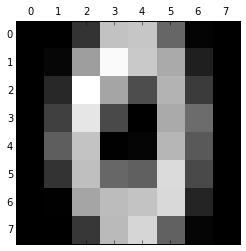

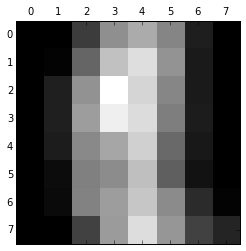

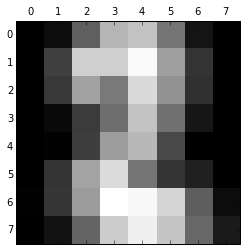

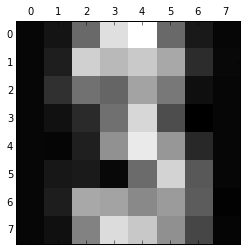

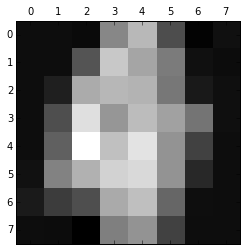

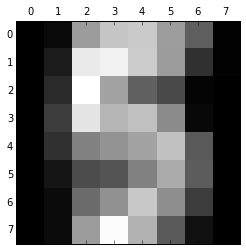

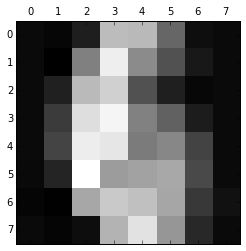

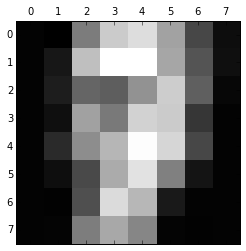

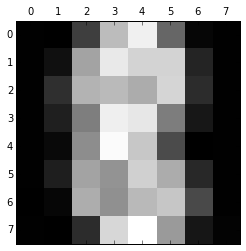

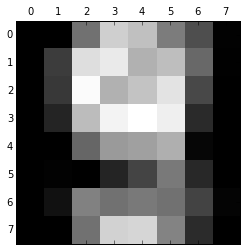

In [5]:
percent_error = 0
while percent_error < 100:  #This section of code iterates through the first thousand 
                            #input images until it can guess them all correctly.
    n = 0
    ni = n
    error = 0
    while n < 1000:
        error = check_number(n,w,error)[1]
        w = check_number(n,w,error)[0]
        n = n + 1

    percent_error = -100*(((n-ni)-(check_number(n,w,error)[1]))/(ni-n))
    print (check_number(n,w,error)[1], '/', n-ni, '->', percent_error, '% correct')

#This displays the sample images, which in theory, look like each digit.
j = -1
for i in w:
    j = j + 1
    plt.matshow(w[j], cmap=cm.gray)

In [6]:
#Now test the program on unseen data.
n = 1000
ni = n
error = 0

while n < 1700:
        error = check_number(n,w,error)[1]
        #w = check_number(n,w,error)[0]
        n = n + 1
        
percent_error = -100*(((n-ni)-(check_number(n,w,error)[1]))/(ni-n))
print (check_number(n,w,error)[1], '/', n-ni, '->', percent_error, '% correct')

60 / 700 -> 91.42857142857143 % correct


In [12]:
#The final form of the program, one that guesses the digit it is presented.
def guess_number(n,w):

    x = np.matrix(digits.images[n])
    x = x/np.matrix.sum(x)
    
    d = 10
    u = -1
    
    for i in w:
        u = u + 1
        z = np.absolute(x-i)
        c = np.matrix.sum(z)
        if c < d:
            d = c
            t = u
        
    print ('This looks like a', t)
    plt.matshow(digits.images[n], cmap=cm.gray)
    print("The right answer is", digits.target[n])

In [13]:
h = 1700

This looks like a 0
The right answer is 5


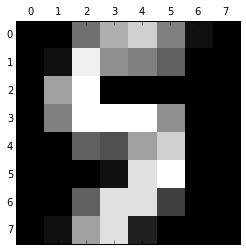

In [16]:
guess_number(h,w)
h = h+1